In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Lagrange interpolation</h1>

In [2]:
def lagrange_basis(x, nodes):
    """
    Calculates the lagrange basis given a set of nodes
    
    Arguments:
        x (numpy array): the continuous dominium over which the basis must be calculated
        nodes (numpy array): the set of n+1 x nodes
        
    Returns:
        basis (numpy array): n+1 x len(x) array with each row representing the basis polynomial l_i(x)
    """
    
    n = len(nodes)
    
    basis = np.zeros((n, len(x)))
    
    for i in range(n):
        l_i = 1
        
        for j in range(n):
            if j != i:
                l_i *= (x - nodes[j]) / (nodes[i] - nodes[j])
        
        basis[i] = l_i
    
    return basis


def lagrange_polynomial(x, nodes, f):
    """
    Calculates the lagrange interpolating polynomial of f on the given set of nodes
    
    Arguments:
        x (numpy array): the continuous dominium over which the polynomial must be calculated
        nodes (numpy array): the set of n+1 x nodes
        f (function of x): function to interpolate
        
    Returns:
        pol (numpy array): interpolated polynomial
    """
    
    basis = lagrange_basis(x, nodes)
    pol = f(nodes) @ basis
    
    return pol

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

In [3]:
# Functions
fs = [
    (lambda x: np.sin(3*x), 0, 7),
    (lambda x: np.log(x), 1, 1.5),
    (lambda x: np.exp(x), 0, 1),
    (lambda x: x**5+3*x**4+2*x**3-x**2-5+1, -5, 5),
    (lambda x: 1/(1+x**2), -5, 5),
    (lambda x: np.abs(x), 0, 5),
    (lambda x: np.abs(x), -3, 2),
    (lambda x: np.sin(x**2), -5, 5),
    (lambda x: np.abs(np.sin(x**2)), -5, 5),
    (lambda x: np.sign(x), -5, 5)
]

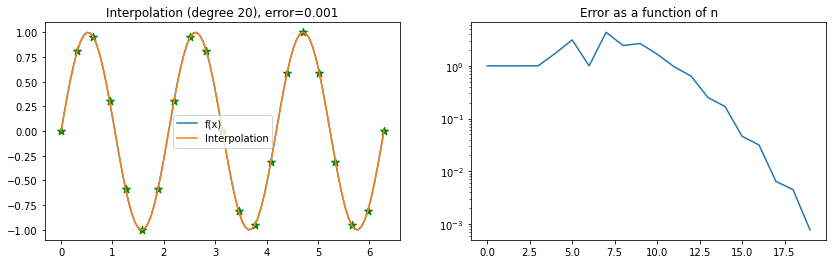

In [12]:
f, a, b = fs[0]

# Continuous range
x = np.linspace(a, b, 101)

### Plot of the polinomial for fixed n
n = 20

# Nodes
nodes = np.linspace(a, b, n+1)

fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1, 2, 1)

pol = lagrange_polynomial(x, nodes, f)
err = np.max(np.abs(f(x) - pol))

ax1.plot(x, f(x), label='f(x)')
ax1.plot(x, pol, label='Interpolation')
ax1.scatter(nodes, f(nodes), marker='*', color='green', s=70)
ax1.set_title(f'Interpolation (degree {n}), error={round(err, 3)}')
ax1.legend()

### Plot of the error as a function of n
ax2 = fig.add_subplot(1, 2, 2)

errors = []

for n in range(20):
    nodes = np.linspace(a, b, n+1)
    
    pol = lagrange_polynomial(x, nodes, f)
    err = np.max(np.abs(f(x) - pol))
    
    errors.append(err)
    
ax2.semilogy(errors)
ax2.set_title('Error as a function of n')


plt.show()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Piece-wise Lagrange interpolation</h1>

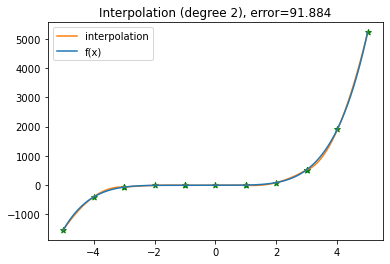

In [5]:
# Function
f, a, b = fs[3]

# Degree of the polinomials
k = 2

# Size of the intervals
j = 2

### Interpolation

pol = np.array([])

for i in np.arange(a, b, j):
    # Continuous range
    x = np.linspace(i, i+j, 101)
    
    # Nodes
    nodes = np.linspace(i, i+j, k+1)

    # Interpolation
    pol_j = lagrange_polynomial(x, nodes, f)
    
    plt.scatter(nodes, f(nodes), marker='*', color='green')
    pol = np.concatenate((pol, pol_j))

x = np.linspace(a, b, len(pol))
err = np.max(np.abs(f(x) - pol))

plt.plot(x, pol, color='#ff7f0e', label='interpolation')
plt.plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), label='f(x)', color='#1f77b4')
plt.title(f'Interpolation (degree {k}), error={round(err, 3)}')
plt.legend()
plt.show()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Hermite interpolation</h1>

In [6]:
def hermite_basis(x, xj):
    n = len(xj) 
    
    basis = np.zeros((n, mi+1, len(x)))
    
    for i in range(n):
        for j in range(mi+1):
            l_ij = (x - xj[i])**j/np.math.factorial(j) 
            
            for k in range(n):
                if k != i:
                    l_ij *= ((x - xj[k]) / (xj[i] - xj[k]))**(mi + 1)
   
            basis[i, j] = l_ij
            
    return basis

def evaluate_basis(x, l, xi):
    x_index = (np.abs(x - xi)).argmin()
    
    return l[x_index]

In [7]:
def characteristic_polynomials(x, xj):
    n = len(xj) 
    
    L = np.zeros((n, mi+1, len(x)))
    basis = hermite_basis(x, xj)
    
    for i in range(n):
        L[i, mi] = basis[i, mi]
    
    for i in range(n):
        l_ij = basis[i, 0]
        
        l_ijk = evaluate_basis(x, np.gradient(l_ij, step), xj[i])
        
        L[i, 0] = l_ij - l_ijk * L[i, 1]
        
    return L

In [8]:
def hermite_polynomial(x, xj, f, df):
    """
    x: continuous range over which to calculate the polynomial 
    data: set of nodes with additional information on the derivatives
    """
    n = len(xj)
    
    L = characteristic_polynomials(x, xj)
    pol = np.zeros((len(x),))
    
    for i in range(n):
        pol += f(xj[i])*L[i, 0] + df(xj[i])*L[i, 1]
            
    return pol

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

In [9]:
# Functions
fs = [
    (lambda x: np.sin(3*x), 0, 2*np.pi),
    (lambda x: np.log(x), 1, 1.5),
    (lambda x: np.exp(x), 0, 1),
    (lambda x: x**5+3*x**4+2*x**3-x**2-5*x+1, -5, 5),
    (lambda x: 1/(1+x**2), -5, 5),
    (lambda x: np.abs(x), 0, 5),
    (lambda x: np.abs(x), -3, 2),
    (lambda x: np.sin(x**2), -5, 5),
    (lambda x: np.abs(np.sin(x**2)), -5, 5),
    (lambda x: np.sign(x), -5, 5)
]

# Derivatives

dfs = [
    lambda x: 3*np.cos(3*x),
    lambda x: 1/np.abs(x),
    lambda x: np.exp(x),
    lambda x: 5*x**4+12*x**3+6*x**2-2*x-5,
    lambda x: -2*x/(1+x**2)**2
]

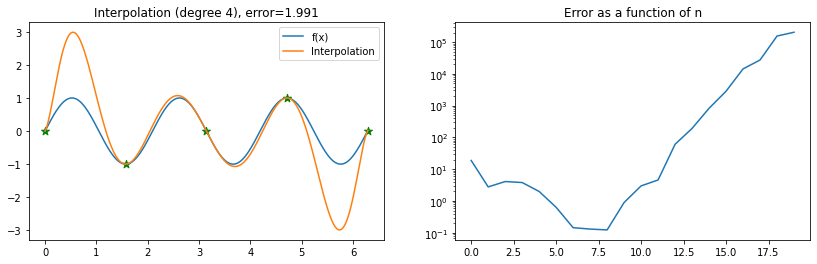

In [15]:
# Function 
i = 0
f, a, b = fs[i]
df = dfs[i]

# Continuous range
step=0.01
x = np.arange(a, b+step, step)

### Plot of the polinomial for fixed n
n = 4

# Nodes
xj = np.linspace(a, b, n+1)

# Highest derivative
mi = 1

fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(1, 2, 1)

pol = hermite_polynomial(x, xj, f, df)
err = np.max(np.abs(f(x) - pol))

ax1.plot(x, f(x), label='f(x)')
ax1.plot(x, pol, label='Interpolation')
ax1.scatter(xj, f(xj), marker='*', color='green', s=70)
ax1.set_title(f'Interpolation (degree {n}), error={round(err, 3)}')
ax1.legend()


### Plot of the error as a function of n
ax2 = fig.add_subplot(1, 2, 2)

errors = []

for n in range(20):
    xj = np.linspace(a, b, n+1)
    
    pol = hermite_polynomial(x, xj, f, df)
    err = np.max(np.abs(f(x) - pol))
    
    errors.append(err)
    
ax2.semilogy(errors)
ax2.set_title('Error as a function of n')

plt.show()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Piece-wise Hermite interpolation</h1>

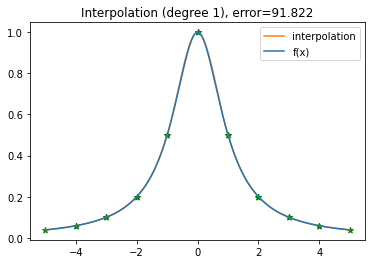

In [15]:
# Function
i = 4
f, a, b = fs[i]
df = dfs[i]

# Degree of the polinomials
k = 1

# Size of the intervals
j = 1

pol = np.array([])

for interval in np.arange(a, b, j):
    a = interval
    b = interval + j
    
    # Continuous range
    step=0.01
    x = np.arange(a, b+step, step)

    ### Plot of the polinomial for fixed n

    # Nodes
    xj = np.linspace(a, b, k+1)

    # Highest derivative
    mi = 1

    pol_h = hermite_polynomial(x, xj, f, df)

    pol = np.concatenate((pol, pol_h))
    plt.scatter(xj, f(xj), marker='*', color='green')

f, a, b = fs[i]
x = np.linspace(a, b, len(pol))

plt.plot(x, pol, color='#ff7f0e', label='interpolation')
plt.plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), label='f(x)', color='#1f77b4')
plt.title(f'Interpolation (degree {k}), error={round(err, 3)}')
plt.legend()
plt.show()

In [25]:
import sympy as sp

x = sp.Symbol('x')
f = sp.sin(x)**2

# Eight derivative of f
f.diff(x, x, x, x, x, x, x, x)

128*(sin(x)**2 - cos(x)**2)

In [30]:
from math import factorial

a = 128/factorial(8)*1e8

**Exercise 2:** 
Provide an estimate of the error (independent from the distribution of the nodes)
approximating the function $f(x) = \sin^2(x)$ in the interval $[−5, 5]$ with a polynomial interpolation of degree 7 .

$\implies\ \ \ \ ||E_n(x)|| = ||\frac{f^{(n+1)}(\xi)}{(n+1)!}\omega_{n+1}(x)|| = ||\frac{f^{(8)}(\xi)}{8!}\omega_{8}(x)|| = ||\frac{128\big(\sin^2(\xi)-\cos^2(\xi)\big)}{8!}\omega_{8}(x)||\leq \frac{128}{8!}||\omega_{8}(x)||\leq \frac{128}{8!}10^8=$ {{a}}